In [9]:
from gs_quant.session import GsSession
# external users should substitute their client id and secret; please skip this step if using internal jupyterhub
GsSession.use(client_id=None, client_secret=None, scopes=('run_analytics',)) 

### Swaption Carry Grid

In this screen, we compare carry of swaptions for a fixed strike and for a fixed horizon across a range of expiries and tenors.

In [21]:
from gs_quant.instrument import IRSwaption
from gs_quant.markets.portfolio import Portfolio
from gs_quant.risk import RollFwd
import pandas as pd
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format

def carry_grid(horizon, expiries, termination, pay_rec, ccy, moneyness):
    portfolios = Portfolio([Portfolio([IRSwaption(pay_or_receive=pay_rec, notional_currency=ccy, termination_date=t, 
                                              expiration_date=e, strike=f'ATMF+{moneyness}') for e in expiries]) for t in termination])
    portfolios.resolve()

    price = portfolios.price()
    price_df = price.to_frame()

    with RollFwd(horizon):
        price_fwd = portfolios.price()

    price_fwd_df = price_fwd.to_frame()
    carry = 100*(price_fwd_df - price_df)/price_df
    carry.index = termination #Keep ordering
    carry.columns= expiries
    
    ##plot
    carry = carry.T
    plt.subplots(figsize=(12, 6))
    ax = sns.heatmap(carry, annot=True, fmt='.2f', cmap='coolwarm')
    ax.set(ylabel='Expiries', xlabel='Tenor', title= horizon + ' carry w. '+ str(moneyness)+'bps moneyness, %')
    ax.xaxis.tick_top()
    return carry

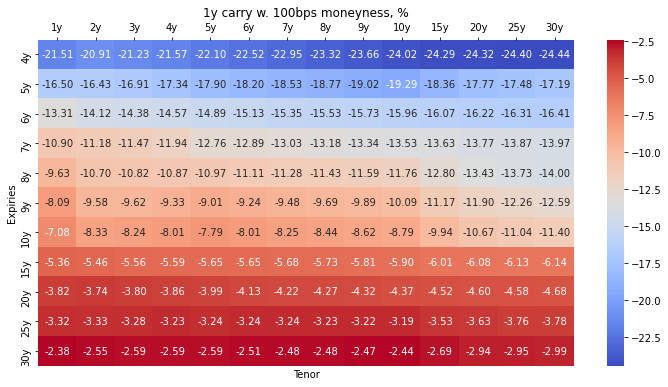

In [22]:
horizon = '1y'
expiries = ['4y', '5y',  '6y', '7y', '8y', '9y', '10y', '15y', '20y', '25y', '30y']
termination = ['1y', '2y', '3y', '4y', '5y',  '6y', '7y', '8y', '9y', '10y', '15y', '20y', '25y', '30y']
pay_rec = 'Pay'
ccy = 'USD'
moneyness = 100

carry = carry_grid(horizon, expiries, termination, pay_rec, ccy, moneyness)